# Install and Import Dependencies 

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 14992, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14992 (delta 0), reused 1 (delta 0), pack-reused 14989
Receiving objects: 100% (14992/14992), 14.01 MiB | 16.96 MiB/s, done.
Resolving deltas: 100% (10302/10302), done.


# YOLO v5 클론 

### https://github.com/ultralytics/yolov5

In [4]:
cd yolov5

/content/yolov5


In [5]:
pip install -r requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00


## import libraries

In [14]:
import torch
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Load Model

* https://pytorch.org/hub/ultralytics_yolov5/

* pre-trained model을 다운로드 하는 것이므로 위의 링크에서 확인할 수 있습니다.

* 위 사이트에 가면 ultralytics yolo5의 크기를 설정할 수 있습니다. , 나는 기본 모델 사용 

In [8]:
model = torch.hub.load("ultralytics/yolov5", 'yolov5s') # torch hub 에서 사전 훈련된 울트라틱스 모델을 로드하는 것입니다. 

# yolov5s 는 특정한 버전을 정의할 수 있습니다. 작은 모델을 사용하므로 s 를 붙이고 버전은 토치 허브에서 확인할 수 있습니다.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-17 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detection

* 공식 문서에 있는 이미지 활용

In [23]:
img = "https://media.istockphoto.com/id/155287967/photo/cars-in-rush-hour-with-traffic-at-dawn.jpg?s=612x612&w=0&k=20&c=tDAaJQMHIh6nFDr0rJlD44tEtmj2srdpoSTKL7C5SGE="

In [24]:
results = model(img)
results.print()

image 1/1: 408x612 22 cars
Speed: 69.8ms pre-process, 360.8ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


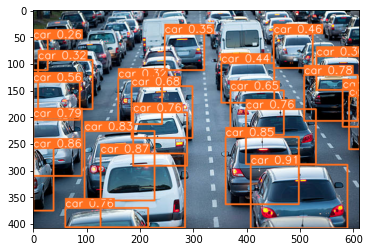

In [25]:
%matplotlib inline 

plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
results.xyxy      # The output from running results.xyxy is as follows : xmin , ymin, xmax, ymax, confidence, class 

                  # 다양한 다른 좌표들을 얻을 수 있음.

[tensor([[4.07406e+02, 2.89385e+02, 5.88957e+02, 4.08000e+02, 9.12926e-01, 2.00000e+00],
         [1.26915e+02, 2.68741e+02, 2.84538e+02, 4.07689e+02, 8.72492e-01, 2.00000e+00],
         [2.10382e-01, 2.58503e+02, 3.83146e+01, 3.75164e+02, 8.60075e-01, 2.00000e+00],
         [3.60700e+02, 2.37509e+02, 4.97348e+02, 3.63832e+02, 8.51849e-01, 2.00000e+00],
         [9.62071e+01, 2.26528e+02, 2.27033e+02, 3.56245e+02, 8.33532e-01, 2.00000e+00],
         [0.00000e+00, 2.01178e+02, 9.16151e+01, 3.10973e+02, 7.88094e-01, 2.00000e+00],
         [5.07429e+02, 1.21653e+02, 6.07474e+02, 2.07202e+02, 7.81547e-01, 2.00000e+00],
         [1.87249e+02, 1.91625e+02, 2.88864e+02, 2.91492e+02, 7.59939e-01, 2.00000e+00],
         [6.08434e+01, 3.70410e+02, 2.15842e+02, 4.06195e+02, 7.58251e-01, 2.00000e+00],
         [3.98687e+02, 1.85690e+02, 5.29600e+02, 2.88583e+02, 7.56478e-01, 2.00000e+00],
         [1.84826e+02, 1.42562e+02, 2.98979e+02, 2.39144e+02, 6.80136e-01, 2.00000e+00],
         [3.69365e+02

In [27]:
np.array(results.render()).shape

(1, 408, 612, 3)

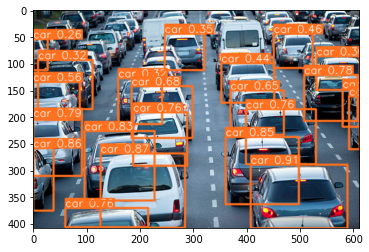

In [28]:
plt.imshow(np.squeeze(results.render()))

# Real Time Detections

### 웹캠에 액세스 하는 방법

* 우리가 실시간으로 감지할 수 있도록 

In [43]:
# 단지 실시간으로 피드에 액세스하는 코드

cap = cv2.VideoCapture(0) # 웹캠에 액세스 하는 방법 , 자신의 기기에서 비디오 캡쳐 장치가 몇 번인지 확인.  

if not cap.isOpened():
  print("fail")

while cap.isOpened(): # 캠이 열려있는 동안 수행 
    ret, frame = cap.read() # 웹캠의 프레임이나 웹캠에서 이미지를 더한 부분 반환 
    
    # Make Detection
    results = model(frame) # 웹캠에서 얻은 프레임을 통과시킬 것이므로 cap.read를 실행할 때를 기억해야 한다. 
    
    cv2.imshow('YOLO', np.squeeze(results.render())) # 카메라 상단 팝업 바에 나타날 문장
    
    # np.squeeze(results.render()) -> 배열을 렌더링 함수에 넣기, cv2.imshow를 사용하여 이를 수행해야 하는데 
    # 나는 squeeze를 통해서 결과를 내야하므로 큰 배열에서 추출해야 합니다.
    
    if cv2.waitKey(10) & 0xff == ord('q'): # 여기서부터는 정상적으로 종료하는 것에 대한 코드. # q키를 누르고 있는지에 대한 여부 확인 
        break

cap.release() # 웹캠 해제
cv2.destroyAllWindows()

fail
